In [22]:
import jupyter_black

jupyter_black.load(line_length=120)

In [23]:
import pandas as pd
import re
from nltk.corpus import stopwords
from collections import Counter
import plotly.express as px
import nltk

# nltk.download("stopwords")

In [24]:
df = pd.read_csv("datasets/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [25]:
df.describe(include="all")

id     keyword location  \
count    7613.000000        7552     5080   
unique           NaN         221     3341   
top              NaN  fatalities      USA   
freq             NaN          45      104   
mean     5441.934848         NaN      NaN   
std      3137.116090         NaN      NaN   
min         1.000000         NaN      NaN   
25%      2734.000000         NaN      NaN   
50%      5408.000000         NaN      NaN   
75%      8146.000000         NaN      NaN   
max     10873.000000         NaN      NaN   

                                                     text      target  
count                                                7613  7613.00000  
unique                                               7503         NaN  
top     11-Year-Old Boy Charged With Manslaughter of T...         NaN  
freq                                                   10         NaN  
mean                                                  NaN     0.42966  
std                                                   NaN     0.49506  
min                                                   NaN     0.00000  
25%                                                   NaN     0.00000  
50%                                                   NaN     0.00000  
75%                                                   NaN     1.00000  
max                                                   NaN     1.00000

In [26]:
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df["text"].duplicated().sum()

np.int64(110)

In [29]:
print("\nMissing Values per Column:\n", df.isnull().sum())


Missing Values per Column:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [30]:
df["keyword"].value_counts().head(10)

keyword
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
Name: count, dtype: int64

In [31]:
df["location"].value_counts().head(10)

location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64

In [32]:
target_counts = df["target"].value_counts().reset_index()
target_counts.columns = ["target", "count"]
target_counts["target"] = target_counts["target"].map(
    {0: "Not Disaster", 1: "Disaster"}
)

fig_target = px.bar(
    target_counts,
    x="target",
    y="count",
    title="Distribution of Target Variable",
    labels={"count": "Number of Tweets", "target": "Tweet Type"},
    text_auto=True,
)
fig_target.update_layout(xaxis_title="Tweet Type (0: Not Disaster, 1: Disaster)")
fig_target.show()

In [33]:
df["text_length"] = df["text"].astype(str).apply(len)
df["word_count"] = df["text"].astype(str).apply(lambda x: len(x.split()))

In [34]:
fig_hist_len = px.histogram(
    df,
    x="text_length",
    color="target",
    marginal="box",
    hover_data=df.columns,
    title="Text Length Distribution by Target",
    labels={
        "text_length": "Text Length (Characters)",
        "target": "Target (0: No, 1: Yes)",
    },
    barmode="overlay",
)
fig_hist_len.show()

In [35]:
fig_hist_word = px.histogram(
    df,
    x="word_count",
    color="target",
    marginal="box",
    hover_data=df.columns,
    title="Word Count Distribution by Target",
    labels={"word_count": "Word Count", "target": "Target (0: No, 1: Yes)"},
    barmode="overlay",
)
fig_hist_word.show()

In [36]:
def clean_text(text):
    text = text.lower()
    text = re.sub(
        r"http\S+|www\S+|https\S+", "<url>", text, flags=re.MULTILINE
    )  # Remove URLs
    text = re.sub(r"\@\w+", "<mention>", text)  # Remove mentions
    text = re.sub(r"|\#", "", text)  # Remove hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text_tokens = text.split()
    stop_words = set(stopwords.words("english"))
    filtered_words = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_words)


def get_top_words(corpus, n=20):
    words = " ".join(corpus).split()
    count = Counter(words)
    most_common = count.most_common(n)
    return pd.DataFrame(most_common, columns=["Word", "Frequency"])


# Apply cleaning before analysis
cleaned_text_disaster = df[df["target"] == 1]["text"].apply(clean_text)
cleaned_text_non_disaster = df[df["target"] == 0]["text"].apply(clean_text)

In [37]:
print("\nTop 20 words in Disaster Tweets:")
print(get_top_words(cleaned_text_disaster))

print("\nTop 20 words in Non-Disaster Tweets:")
print(get_top_words(cleaned_text_non_disaster))


Top 20 words in Disaster Tweets:
          Word  Frequency
0          url       2511
1      mention        868
2         fire        178
3         news        135
4          via        121
5     disaster        117
6   california        111
7      suicide        110
8       police        107
9          amp        106
10      people        105
11      killed         93
12        like         92
13   hiroshima         86
14       storm         85
15       crash         84
16       fires         84
17          us         81
18    families         81
19       train         79

Top 20 words in Non-Disaster Tweets:
       Word  Frequency
0       url       2202
1   mention       1798
2      like        253
3        im        243
4       amp        192
5       new        168
6       get        163
7      dont        141
8       one        127
9      body        112
10      via         99
11    would         97
12    video         96
13   people         90
14     love         89
15        2   

In [38]:
# Stop words distribution by target

In [39]:
fig_hist_word = px.histogram(
    df,
    x="location",
    color="target",
    marginal="box",
    hover_data=df.columns,
    title="Location Distribution by Target",
    labels={"location": "Location", "target": "Target (0: No, 1: Yes)"},
    barmode="overlay",
)
fig_hist_word.show()

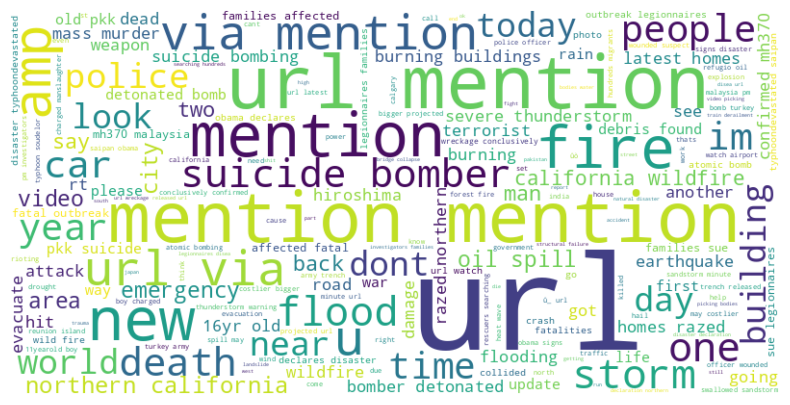

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    " ".join(cleaned_text_disaster)
)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
def has_url(text):
    return 1 if re.search(r"http\S+|www\S+|https\S+", text) else 0


df["has_url"] = df["text"].apply(has_url)
df["has_url"].value_counts()

has_url
1    3976
0    3637
Name: count, dtype: int64

In [42]:
df[["has_url", "target"]].corr()

has_url    target
has_url  1.000000  0.247375
target   0.247375  1.000000

In [43]:
fig_url = px.histogram(
    df,
    x="has_url",
    color="target",
    marginal="box",
    hover_data=df.columns,
    title="Distribution of Tweets with and without URLs by Target",
    labels={"has_url": "Has URL (0: No, 1: Yes)", "target": "Target (0: No, 1: Yes)"},
    barmode="overlay",
)
fig_url.show()